In [53]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
data_file = 'Naive-Bayes-Classification-Data.csv'
data = pd.read_csv(data_file)
data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


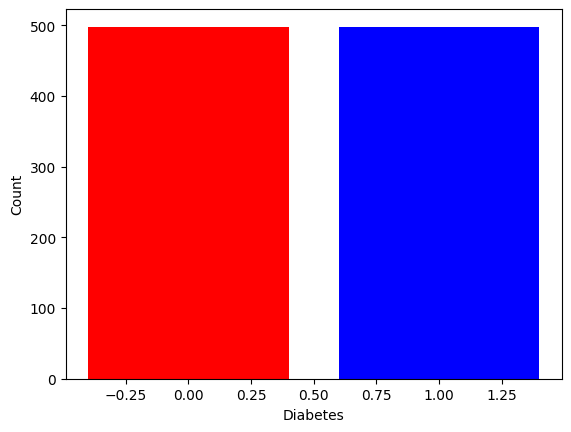

In [56]:
diabetes_counts = data['diabetes'].value_counts()
plt.bar(diabetes_counts.index, diabetes_counts.values , color = ['blue', 'red'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# we can notice that the data is balanced

In [57]:
def calculate_prior(data):
    return data['diabetes'].value_counts() / len(data)
p_1 , p_0 = calculate_prior(data)
#p(yes) = 0.5005
#p(no) = 0.4995

In [58]:
#Likelihood
# p(x/X)   , x is {yse  , no} , X is {x1 , x2 , x3 , x4 , x5}
# features = ['glucose' , 'bloodpressure']
# def calculate_likelihood(data):
#           likelihood = {  }
#           for feat in features :
#                     print(data['diabetes'].unique())
#                     for output in data['diabetes'].unique() :
                              
#                               output_count =  sum(data['diabetes'] == output)
#                               print("val : " + str(output_count)) 
#                               for elem in data[feat].value_counts() :
#                                         feat_count = sum( data[feat] == elem)
#                                         likelihood[f'{elem}_{output}'] = feat_count / output_count

#           return likelihood

# calculate_likelihood(data)
#this  for  a categical data
    

In [59]:
import numpy as np

features = ['glucose', 'bloodpressure']

def calculate_likelihood(data):
    # Reset likelihoods for each calculation
    local_likelihood = { 'glucose_0': 1, 'glucose_1': 1, 'bloodpressure_0': 1, 'bloodpressure_1': 1 }
    
    for feat in features:
        for output in data['diabetes'].unique():
            # Calculate mean and standard deviation
            mean = data[data['diabetes'] == output][feat].mean()
            std = data[data['diabetes'] == output][feat].std()
            std = std if std > 0 else 1e-6  # Avoid division by zero
            
            # Calculate likelihood for each feature value in the output class
            for elem in data[data['diabetes'] == output][feat]:
                local_likelihood[f'{feat}_{output}'] *= (1 / np.sqrt(2 * np.pi * std)) * np.exp(- (elem - mean) ** 2 / (2 * std**2))
                
    return local_likelihood

# Use the function and update the likelihoods
likelihood = calculate_likelihood(data)
likelihood


{'glucose_0': 0.0,
 'glucose_1': 0.0,
 'bloodpressure_0': 0.0,
 'bloodpressure_1': 0.0}